# 1. Input the required libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load the dataset and normalize every image.

In [2]:
#load dataset
data = np.load('ORL_faces.npz')

x_train = data['trainX']
x_test = data['testX']

#normalize every image
x_train = np.array(x_train,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255

# load the Labels of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data and dimensions
print('x_train : {}'.format(x_train[:]))
print('Y-train : {}'.format(y_train))
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train : [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 

Note :For CNN, The size of all the images must be the same

In [3]:
#Resizing images to a same dimension

im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)


print('x_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: (240,)
x_test shape: (160,)


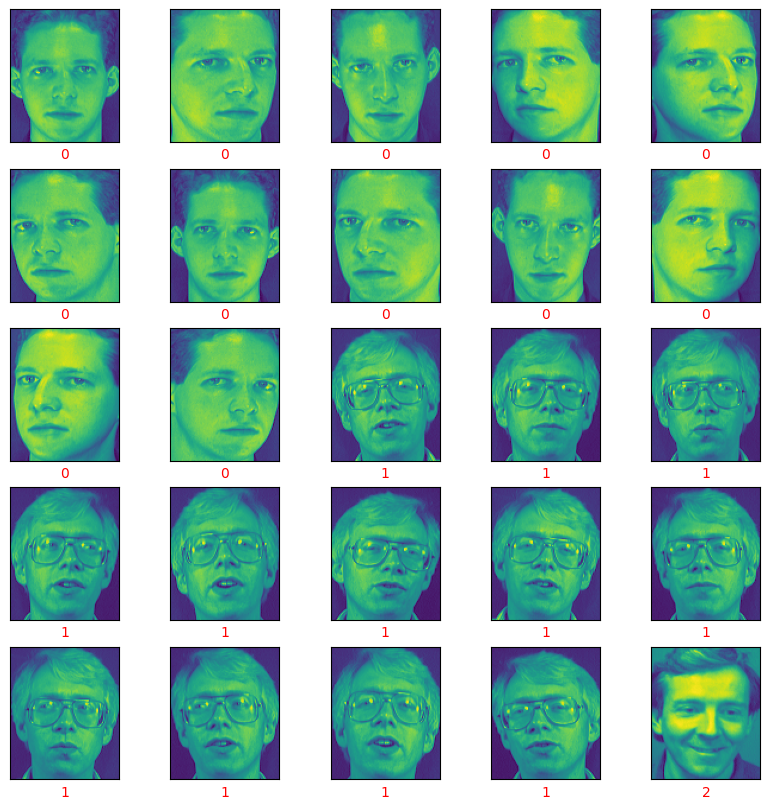

In [4]:
# Visualising few images from Train Dataset with respective labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i], color='red')
plt.show()

# 3. Split DataSet : Validation data and Train

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then neural network is overfitting and training should be stopped.

Usually 30% of dataset is used as the validation. Here only 5% is used because the dataset has very few images.

In [5]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=42,)

# 4. Model Building

Build CNN model: <p>
Three main layers of CNN
1. Convolotional layer
2. pooling layer
3. fully connected layer

In [6]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #40 is the number of outputs
    Dense(40, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# Model Parameters
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

# 5. Train the Model

In [8]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/100
1/1 - 21s - loss: 3.6998 - accuracy: 0.0044 - val_loss: 3.6363 - val_accuracy: 0.0000e+00 - 21s/epoch - 21s/step
Epoch 2/100
1/1 - 9s - loss: 3.6723 - accuracy: 0.0219 - val_loss: 3.6022 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 3/100
1/1 - 10s - loss: 3.6032 - accuracy: 0.0526 - val_loss: 3.5606 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 4/100
1/1 - 10s - loss: 3.5676 - accuracy: 0.0307 - val_loss: 3.5169 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 5/100
1/1 - 9s - loss: 3.5352 - accuracy: 0.0570 - val_loss: 3.4685 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 6/100
1/1 - 10s - loss: 3.4938 - accuracy: 0.0482 - val_loss: 3.4230 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 7/100
1/1 - 10s - loss: 3.4944 - accuracy: 0.0658 - val_loss: 3.3835 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 8/100
1/1 - 9s - loss: 3.5368 - accuracy: 0.0570 - val_loss: 3.3587 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 9/1

# 6. Evaluate the test data

In [9]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.4062
test acc 0.9000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


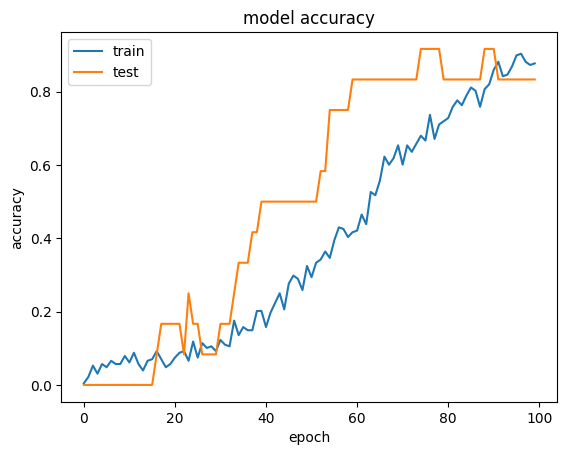

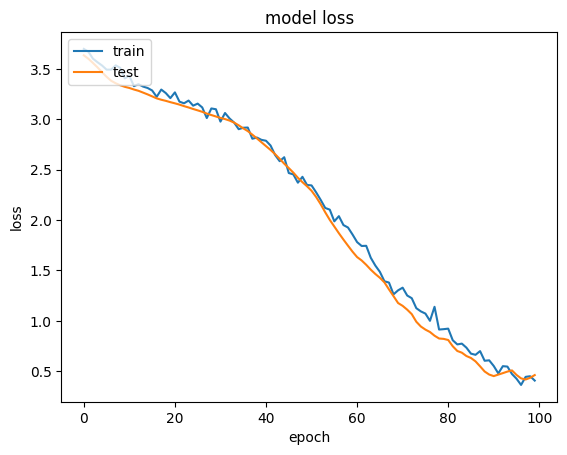

In [10]:
# Plotting the results (Model Acuuracy and Loss)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

